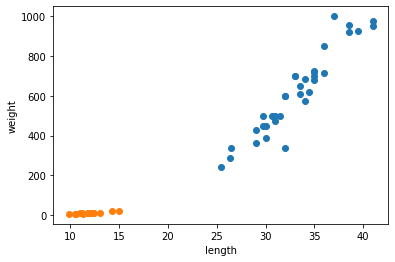

train과 test로 분리된 데이터


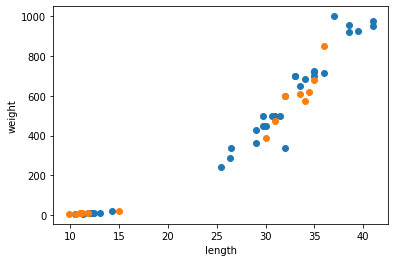

예측 데이터
[0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
정답 데이터
[0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3,
                11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7,
                10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 데이터 출력
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 두 데이터를 합침
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 길이 / 무게
fish_data = np.column_stack((length, weight))

# 정답
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

# KNN 사용
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

kn.predict([[30, 600]])

# train 데이터와 test 데이터 분리
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

np.random.seed(42)

index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

# 출력
print('train과 test로 분리된 데이터')
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 확인
kn = kn.fit(train_input, train_target)
kn.score(train_input, train_target)

# 예측
print('예측 데이터')
print(kn.predict(test_input))
print('정답 데이터')
print(test_target)

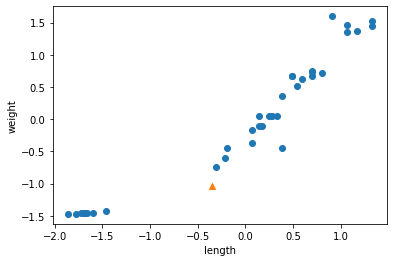

In [3]:
# 표준 점수 (Z 점수)로 바꾸기
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

train_scaled = (train_input - mean) / std

# 출력
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()